<a href="https://colab.research.google.com/github/wiemila/GCE-ML-electrode-area/blob/main/WM_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Zeszyt1.csv to Zeszyt1.csv


In [11]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Zeszyt1.csv']),delimiter=';')

In [12]:
df

,Type of electrode,Type code,Ep_Ox [V],Ep_Red [V],deltaE [V],Ip_Ox [uA],Ip_Red [uA],Q_Ox [uC],Q_Red [uC],slope_Ox [uC/s^0.5],slope_Red [uC/s^0.5]
0,GCE_CB,2,0.250,0.190,0.060,8.023,-8.293,28.600,27.100,17.1720,-13.0800
1,GCE_CB,2,0.250,0.190,0.060,8.595,-9.159,28.900,29.400,18.1310,-13.2830
2,GCE_CB,2,0.250,0.190,0.060,8.771,-8.877,29.200,30.500,16.0990,-12.6080
3,GCE_CB,2,0.250,0.190,0.060,8.873,-8.817,31.200,31.700,17.3850,-13.9810
4,GCE_GO,3,0.200,0.110,0.090,0.399,-0.358,0.978,0.852,0.6260,-0.5664
5,GCE_GO,3,0.200,0.110,0.090,0.263,-0.250,0.817,0.687,0.5314,-0.4526
6,GCE_GO,3,0.200,0.100,0.100,0.169,-0.239,0.725,0.570,0.4705,-0.3734
7,GCE_GO,3,0.210,0.110,0.100,0.342,-0.463,0.958,0.798,0.6154,-0.5276
8,GCE_GO,3,0.190,0.100,0.090,0.237,-0.256,0.684,0.674,0.4113,-0.3794
9,GCE_GO,3,0.220,0.130,0.090,0.451,-0.703,1.250,1.070,0.7309,-0.6708


### Split the dataset into the features, that will be used for the analysis X and the vector of values that we will want to predict y

In [13]:
#lets choose the all the columns except the concentration
X = df.iloc[:,2:11].values

In [14]:
#lets print first four rows to see if we got it right
print(X[:4,:])

[[  0.25    0.19    0.06    8.023  -8.293  28.6    27.1    17.172 -13.08 ]
 [  0.25    0.19    0.06    8.595  -9.159  28.9    29.4    18.131 -13.283]
 [  0.25    0.19    0.06    8.771  -8.877  29.2    30.5    16.099 -12.608]
 [  0.25    0.19    0.06    8.873  -8.817  31.2    31.7    17.385 -13.981]]


In [16]:
# Normalization : scaling individual samples to have unit norm
from sklearn.preprocessing import StandardScaler, normalize;

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X)

# Converting the numpy array into a pandas DataFrame
normX = pd.DataFrame(X_normalized)
normX


,0,1,2,3,4,5,6,7,8
0,0.005390,0.004096,0.001294,0.172965,-0.178786,0.616577,0.584239,0.370205,-0.281987
1,0.005143,0.003909,0.001234,0.176828,-0.188431,0.594569,0.604856,0.373015,-0.273275
2,0.005150,0.003914,0.001236,0.180668,-0.182852,0.601472,0.628250,0.331613,-0.259704
3,0.004872,0.003703,0.001169,0.172933,-0.171841,0.608081,0.617826,0.338830,-0.272487
4,0.120766,0.066421,0.054345,0.240929,-0.216172,0.590547,0.514464,0.377999,-0.342010
5,0.148309,0.081570,0.066739,0.195026,-0.185386,0.605840,0.509440,0.394056,-0.335622
6,0.171688,0.085844,0.085844,0.145076,-0.205167,0.622368,0.489310,0.403895,-0.320541
7,0.130007,0.068099,0.061908,0.211726,-0.286635,0.593080,0.494027,0.380983,-0.326628
8,0.159944,0.084181,0.075763,0.199509,-0.215503,0.575797,0.567379,0.346236,-0.319382
9,0.104143,0.061539,0.042604,0.213493,-0.332783,0.591720,0.506512,0.345990,-0.317541


In [32]:
# we will try to predict the concentration content so lets column concentration to y
y_train = [3,3,3,3]

In [33]:
# and check if its the concentration
print(y_train)

[3, 3, 3, 3]


## Splitting the dataset into the Training set and Test set

In [29]:
X_train=normX.iloc[0:4,:].values
X_train

array([[ 0.00538966,  0.00409614,  0.00129352,  0.17296498, -0.17878582,
         0.61657715,  0.58423919,  0.370205  , -0.28198703],
       [ 0.00514333,  0.00390893,  0.0012344 ,  0.17682772, -0.18843107,
         0.59456906,  0.60485572,  0.37301494, -0.27327546],
       [ 0.00514959,  0.00391369,  0.0012359 ,  0.18066828, -0.18285171,
         0.60147234,  0.62825022,  0.33161312, -0.25970422],
       [ 0.00487244,  0.00370306,  0.00116939,  0.17293279, -0.17184136,
         0.60808104,  0.61782593,  0.33882977, -0.27248657]])

In [30]:
X_test=normX.iloc[4:,:].values
X_test

array([[ 0.1207663 ,  0.06642146,  0.05434483,  0.24092876, -0.21617167,
         0.5905472 ,  0.51446443,  0.37799851, -0.34201016],
       [ 0.14830856,  0.08156971,  0.06673885,  0.19502575, -0.1853857 ,
         0.60584046,  0.5094399 ,  0.39405584, -0.33562227],
       [ 0.17168775,  0.08584387,  0.08584387,  0.14507615, -0.20516686,
         0.62236808,  0.48931008,  0.40389543, -0.32054102],
       [ 0.13000716,  0.06809899,  0.06190817,  0.21172595, -0.28663484,
         0.5930803 ,  0.49402722,  0.3809829 , -0.32662752],
       [ 0.15994371,  0.0841809 ,  0.07576281,  0.19950873, -0.2155031 ,
         0.57579734,  0.56737925,  0.34623603, -0.31938233],
       [ 0.1041427 ,  0.06153887,  0.04260383,  0.21349253, -0.33278326,
         0.59171987,  0.50651221,  0.34599045, -0.31754055],
       [ 0.10541038,  0.06525405,  0.04015634,  0.22336962, -0.29966666,
         0.60736458,  0.49743661,  0.36160781, -0.3102077 ],
       [ 0.20777983,  0.12029358,  0.08748624,  0.11154496, -0

# Regression

# Partial Least Squares

In [34]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

### Apply the model to different parameters and check the opmimum number of Latent Variables

In [35]:
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
predictions =pls.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:300: UserWarning: Y residual is constant at iteration 0
  warnings.warn(f"Y residual is constant at iteration {k}")


In [36]:
predictions

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

# Multiple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions_lr = regressor.predict(X_test)
predictions_lr

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3.])

# Principal Component Regression

In [40]:
# first perform PCA and choose the number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

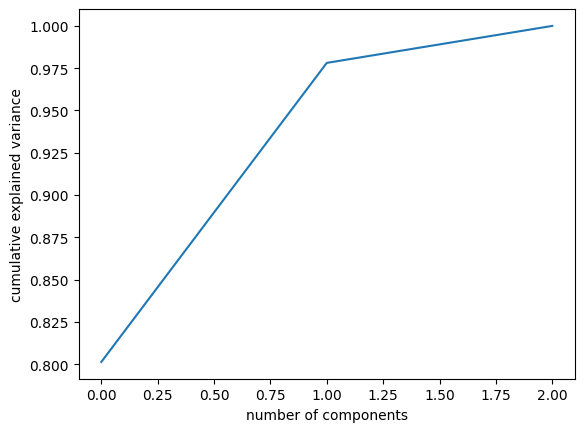

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [43]:
# perform PCA with the chosen number of components, fit it only on the training data
# and use this model to transform both train and test sets
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [44]:
# perform linear regression with the results of the PCA
regressor2 = LinearRegression()
regressor2.fit(X_pca_train, y_train)

LinearRegression()

In [45]:
predictions_lr_pca = regressor2.predict(X_pca_test)
predictions_lr_pca

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3.])